# Sort Algorithms

More sorting algorithms [here](https://www.geeksforgeeks.org/sorting-algorithms/)

Merge vs Bubble sorting [here](https://levelup.gitconnected.com/sorting-algorithms-selection-sort-bubble-sort-merge-sort-and-quicksort-75479f8f80b1)

### Bubble Sort
* Simplest sorting algorithm
* Basically goes through entire list & checks the number next to it and then swaps positions if numbers are out of order\
* Repeats until fully sorted


*Not great for big data sets*

### Merge Sort --- *Divide & conquer approch to sorting* (RECURSIVE)
* basically takes a list and repeatedly divides a list in half until each item is contained in its own individual list
* Sort based on neighboring numbers
* THEN, re-attach the numbers back to each half of the list & *merge* the list based on the numerical order

For a better explanation/visualization, look at this [gif](https://miro.medium.com/max/832/1*mh9np1i9PCF2F-4dSEMKuA.gif)

![Merge Sorting GIF](https://miro.medium.com/max/832/1*mh9np1i9PCF2F-4dSEMKuA.gif)

In ascending order; returns a new sorted list

1. DIVIDE -- Find the midpoint of the list & divide into sublists, until 1 element remains in each sublist
2. CONQUER  -- Recursively sort the sublists created in previous step
3. COMBINE -- Merge the sorted sublists created in previous step

In [7]:
## MAIN FUNCTION
## O(log n) [split()] * O(n) [merge()] === overall O(n log n) time; PYTHON EXCEPTION w/ split_slicing()): overall O(kn log n)
def merge_sort(list):
    # If main list is less than or equal to one OR divded sublist is down to one element:
    if len(list) <= 1:
        return list

    left_half, right_half = split_iterative(list) # O(log n)
    #left_half, right_half = split_splicing(list) # O(k)

    # RECURSION
    left_sorted = merge_sort(left_half)
    right_sorted = merge_sort(right_half)

    # Sorts & combines lists
    return merge(left_sorted, right_sorted) #O(n)


## Divide the unsorted list at midpoint into sublists, returns two sublists, left (for left_half) & right (for right_half)
## O(k log n) time
def split_slicing(list):
    midpoint = len(list) // 2

    ## PYTHON BIG-O EXCEPTION: slicing takes O(k), where k is number of elements needing to be sliced (more expensive)
    left = list[:midpoint]
    right = list[midpoint:]

    return left, right

## Same as above, but O(log n) time
def split_iterative(list):
    index = 0 # O(1)
    last_element_index = len(list) - 1 # O(1)

    left = []
    right = []

    ## Find middle elemnt with floor division (//) : rounds down to nearest whole number
    midpoint = len(list) // 2  

    # Will keep repeating loop and "discarding" halves until the first element is greater than the last element if & when found
    # Otherwise, will return None
    while index <= last_element_index:
        if index < midpoint:
            left.append(list[index])
        else:
            right.append(list[index])

        index += 1
    
    return left, right



## Combines/merges two lists, sorting them in the process; returns a merged, sorted list
## O(n) time
def merge(left, right):
    sorted_ls = []

    index_left = 0
    index_right = 0

    # Swapping loop; Keep executing loop until you reach the end of both lists (or the shortest list)
    while index_left < len(left) and index_right < len(right):
        if left[index_left] < right[index_right]:
            sorted_ls.append(left[index_left])
            index_left += 1
        else:
            sorted_ls.append(right[index_right])
            index_right += 1

    # Assuming LEFT list is longer than right list, then append the remaining left list elements, startting from index_left
    while index_left < len(left):
        sorted_ls.append(left[index_left]) # left off from index_left value from previous while loop
        index_left += 1

    # Assuming RIGHT list is longer than left list, then append the remaining right list elements, startting from index_right
    while index_right < len(right):
        sorted_ls.append(right[index_right]) # left off from index_left value from previous while loop
        index_right += 1


    return sorted_ls

## Makes sure that list is actually sorted correctly; return boolean
def verify_sorted(list):
    ls_length = len(list)

    if ls_length == 0 or ls_length == 1:
        return True
    
    # RECURSION; will work with a sublist of a sublist until it reaches a length of 0 or 1 (see screenshot for visual recursion explanation)
    return list[0] <= list[1] and verify_sorted(list[1:])


Visual recursion example from `verify_sorted()` function:

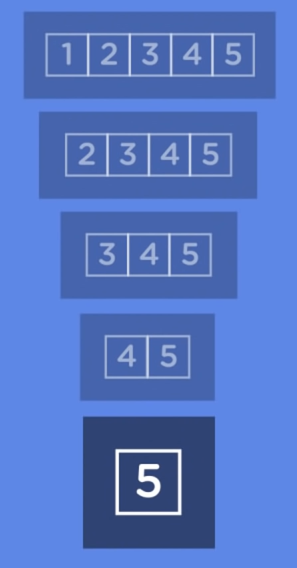

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots\merge-sort-verify-recursion.png")

In [9]:
ls = [96, 85, 8, 62, 3, 37, 91, 16, 102, 10, 51]

sorted_ls = merge_sort(ls)
print(sorted_ls)

[3, 8, 10, 16, 37, 51, 62, 85, 91, 96, 102]


In [10]:
verify_sorted(sorted_ls)

True

### Selection Sort

### Insertion Sort

### Quick Sort